In [2]:
import pandas as pd
data = pd.read_csv('D:\\Datasets\\Linear regression\\Insurance_charges_prediction(linear Regression)\\insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
for col in data.columns:
    print(col,data[col].isnull().sum())

age 0
sex 0
bmi 0
children 0
smoker 0
region 0
charges 0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [8]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['sex'] = to_categorical(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['smoker'] = to_categorical(data['smoker'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null float32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null float32
region      1338 non-null object
charges     1338 non-null float64
dtypes: float32(2), float64(2), int64(2), object(1)
memory usage: 62.8+ KB


In [10]:
data.drop('region',axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
sex         1338 non-null float32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null float32
charges     1338 non-null float64
dtypes: float32(2), float64(2), int64(2)
memory usage: 52.3 KB


In [12]:
data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null float64
sex         1338 non-null float64
bmi         1338 non-null float64
children    1338 non-null float64
smoker      1338 non-null float64
charges     1338 non-null float64
dtypes: float64(6)
memory usage: 62.8 KB


In [24]:
import matplotlib.pyplot as plt

In [26]:
x = data[['age','bmi','smoker','sex']]
y = data['charges']

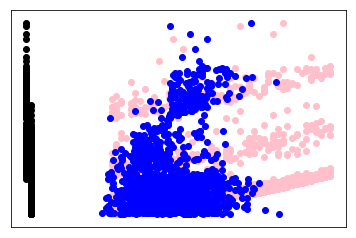

In [27]:
plt.scatter(x['smoker'], y, color='black')
plt.scatter(x['age'], y, color='pink')
#plt.scatter(x['children'], y, color='red')
plt.scatter(x['bmi'], y, color='blue')
#plt.scatter(xtest, pred_y, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain , xtest, ytrain , ytest =train_test_split(x,y,random_state =0 ,test_size = 0.3)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=10000)
lin_reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10000,
         normalize=False)

In [31]:
test = pd.DataFrame([58.0,35.700,0.0,1.0])

In [32]:
test = test.T

In [33]:
y_pred = lin_reg.predict(xtest)

In [34]:
lin_reg.intercept_

11726.450340975854

In [35]:
lin_reg.score(xtrain,ytrain)

0.727789520359706

In [36]:
print(ytest)

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
981      4500.33925
31       2198.18985
1256    11436.73815
1219     7537.16390
1320     5425.02335
613      6753.03800
1107    10493.94580
1263     7337.74800
406      4185.09790
795     18310.74200
970     10702.64240
824     12523.60480
141      3490.54910
1173     6457.84340
1042    33475.81715
966     23967.38305
467     12643.37780
1098    23045.56616
757     23065.42070
1097     1674.63230
319      4667.60765
1286     3732.62510
459      7682.67000
5        3756.62160
517      8413.46305
           ...     
977      2902.90650
263     36219.40545
1226     6640.54485
359      1607.51010
1070    39871.70430
1115    10807.48630
271     42856.83800
1233    11345.51900
1059     4462.72180
1027    21595.38229
122      2257.47525
992     10118.42400
965      4746.34400
1334     2205.98080
16      10797.33620
861      7151.09200
432      5969.72300
905      4564.19145
875      2690.11380


In [37]:
print(y_pred)

[ 1.15444503e+04  1.00038325e+04  3.72765422e+04  1.65198549e+04
  7.40167028e+03  4.01878482e+03  1.47198421e+03  1.33027993e+04
  7.93151949e+03  6.35662707e+03  3.28238983e+03  9.77089253e+03
  9.13322773e+03  4.73111962e+03  2.79271919e+04  1.03952825e+04
  1.17343404e+04  5.51378214e+03  7.59776156e+03  2.68083606e+04
  3.29818489e+04  1.37787346e+04  1.17896994e+04  3.29454796e+04
  4.88456528e+03  8.63492611e+03  1.17024719e+03  9.35007516e+03
  4.67077309e+03  9.81732158e+03  7.96289948e+03  4.03248664e+04
  1.64647378e+04  1.46104781e+04  2.46059357e+04  5.11532931e+03
  1.25478206e+04  3.07301073e+04  3.27149557e+04  4.24070274e+03
  4.07816476e+03  4.83025149e+03  3.03780809e+04  3.87176257e+04
  2.82999762e+04  4.30145180e+03  1.02890718e+04  7.69109734e+03
  3.18905405e+03  1.08720220e+04  5.52528791e+03  2.25206915e+03
  3.32324906e+04  3.69541268e+04  1.69030980e+04  6.98222464e+03
  6.45680412e+03  9.80404417e+03  7.69552257e+03  1.17343404e+04
  2.47189408e+03  3.78019